# 10 Minutes to Pandas

[Online Reference](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)


This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook).

Customarily, we import as follows:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dsintro).

Creating a [Series](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.775433,-1.395710,-1.071885,-0.658479
2013-01-02,-1.895394,-0.949392,0.368939,-0.772746
2013-01-03,-2.104527,0.605309,-1.811659,0.994425
2013-01-04,-0.915007,0.064705,1.522249,-1.117769
2013-01-05,0.002098,-0.965544,-1.311144,-1.438798
2013-01-06,-0.418921,0.545157,1.078548,-1.192683


Creating a `DataFrame` by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [7]:
df2.B

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[ns]

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics)

Here is how to view the top and bottom rows of the frame:

In [8]:
df.head()

,A,B,C,D
2013-01-01,-1.775433,-1.395710,-1.071885,-0.658479
2013-01-02,-1.895394,-0.949392,0.368939,-0.772746
2013-01-03,-2.104527,0.605309,-1.811659,0.994425
2013-01-04,-0.915007,0.064705,1.522249,-1.117769
2013-01-05,0.002098,-0.965544,-1.311144,-1.438798


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.915007,0.064705,1.522249,-1.117769
2013-01-05,0.002098,-0.965544,-1.311144,-1.438798
2013-01-06,-0.418921,0.545157,1.078548,-1.192683


describe() shows a quick statistic summary of your data:

In [10]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-1.184531,-0.349246,-0.204159,-0.697675
std,0.868075,0.862273,1.379615,0.876487
min,-2.104527,-1.395710,-1.811659,-1.438798
25%,-1.865404,-0.961506,-1.251329,-1.173954
50%,-1.345220,-0.442344,-0.351473,-0.945257
75%,-0.542943,0.425044,0.901145,-0.687046
max,0.002098,0.605309,1.522249,0.994425


Sorting by an axis:

In [11]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.658479,-1.071885,-1.395710,-1.775433
2013-01-02,-0.772746,0.368939,-0.949392,-1.895394
2013-01-03,0.994425,-1.811659,0.605309,-2.104527
2013-01-04,-1.117769,1.522249,0.064705,-0.915007
2013-01-05,-1.438798,-1.311144,-0.965544,0.002098
2013-01-06,-1.192683,1.078548,0.545157,-0.418921


Sorting by values:

In [12]:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-1.775433,-1.395710,-1.071885,-0.658479
2013-01-05,0.002098,-0.965544,-1.311144,-1.438798
2013-01-02,-1.895394,-0.949392,0.368939,-0.772746
2013-01-04,-0.915007,0.064705,1.522249,-1.117769
2013-01-06,-0.418921,0.545157,1.078548,-1.192683
2013-01-03,-2.104527,0.605309,-1.811659,0.994425


## Selection

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing) and [MultiIndex / Advanced Indexing.](http://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced)

### Getting
Selecting a single column, which yields a Series, equivalent to `df.A`:

In [13]:
df['A']

2013-01-01   -1.775433
2013-01-02   -1.895394
2013-01-03   -2.104527
2013-01-04   -0.915007
2013-01-05    0.002098
2013-01-06   -0.418921
Freq: D, Name: A, dtype: float64

Selecting via `[ ]`, which slices the rows.

In [14]:
df[0:3]

,A,B,C,D
2013-01-01,-1.775433,-1.395710,-1.071885,-0.658479
2013-01-02,-1.895394,-0.949392,0.368939,-0.772746
2013-01-03,-2.104527,0.605309,-1.811659,0.994425


In [15]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.895394,-0.949392,0.368939,-0.772746
2013-01-03,-2.104527,0.605309,-1.811659,0.994425
2013-01-04,-0.915007,0.064705,1.522249,-1.117769


#### Selection by Label

See more in [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label).

For getting a cross section using a label:

In [16]:
df.loc[dates[0]]

A   -1.775433
B   -1.395710
C   -1.071885
D   -0.658479
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [17]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-1.775433,-1.395710
2013-01-02,-1.895394,-0.949392
2013-01-03,-2.104527,0.605309
2013-01-04,-0.915007,0.064705
2013-01-05,0.002098,-0.965544
2013-01-06,-0.418921,0.545157


Showing label slicing, both endpoints are included:

In [18]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.895394,-0.949392
2013-01-03,-2.104527,0.605309
2013-01-04,-0.915007,0.064705


Reduction in the dimensions of the returned object:

In [19]:
df.loc['20130102', ['A', 'B']]

A   -1.895394
B   -0.949392
Name: 2013-01-02 00:00:00, dtype: float64

#### Boolean Indexing 

Using a single column’s values to select data.

In [20]:
df[df.A > 0]

,A,B,C,D
2013-01-05,0.002098,-0.965544,-1.311144,-1.438798


Selecting values from a DataFrame where a boolean condition is met.

In [21]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,0.368939,NaN
2013-01-03,NaN,0.605309,NaN,0.994425
2013-01-04,NaN,0.064705,1.522249,NaN
2013-01-05,0.002098,NaN,NaN,NaN
2013-01-06,NaN,0.545157,1.078548,NaN


## Setting

Setting a new column automatically aligns the data by the indexes.

In [22]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [23]:
df['F'] = s1

Setting values by label:

In [24]:
df.at[dates[0], 'A'] = 0

Setting by assigning with a NumPy array:

In [25]:
df.loc[:, 'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [26]:
df

,A,B,C,D,F
2013-01-01,0.000000,-1.395710,-1.071885,5,NaN
2013-01-02,-1.895394,-0.949392,0.368939,5,1.0
2013-01-03,-2.104527,0.605309,-1.811659,5,2.0
2013-01-04,-0.915007,0.064705,1.522249,5,3.0
2013-01-05,0.002098,-0.965544,-1.311144,5,4.0
2013-01-06,-0.418921,0.545157,1.078548,5,5.0


A where operation with setting.

In [27]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,-1.395710,-1.071885,-5,NaN
2013-01-02,-1.895394,-0.949392,-0.368939,-5,-1.0
2013-01-03,-2.104527,-0.605309,-1.811659,-5,-2.0
2013-01-04,-0.915007,-0.064705,-1.522249,-5,-3.0
2013-01-05,-0.002098,-0.965544,-1.311144,-5,-4.0
2013-01-06,-0.418921,-0.545157,-1.078548,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](http://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data).

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [28]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,-1.395710,-1.071885,5,NaN,NaN
2013-01-02,-1.895394,-0.949392,0.368939,5,1.0,NaN
2013-01-03,-2.104527,0.605309,-1.811659,5,2.0,NaN
2013-01-04,-0.915007,0.064705,1.522249,5,3.0,NaN


To drop any rows that have missing data.

In [29]:
df1.dropna(how='any')

,A,B,C,D,F,E


Filling missing data.

In [30]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,-1.395710,-1.071885,5,5.0,5.0
2013-01-02,-1.895394,-0.949392,0.368939,5,1.0,5.0
2013-01-03,-2.104527,0.605309,-1.811659,5,2.0,5.0
2013-01-04,-0.915007,0.064705,1.522249,5,3.0,5.0


To get the boolean mask where values are nan.

In [31]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,True
2013-01-02,False,False,False,False,False,True
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [32]:
df.mean()

A   -0.888625
B   -0.349246
C   -0.204159
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [33]:
df.mean(1)

2013-01-01    0.633101
2013-01-02    0.704831
2013-01-03    0.737825
2013-01-04    1.734389
2013-01-05    1.345082
2013-01-06    2.240957
Freq: D, dtype: float64

### Apply

Applying functions to the data

In [34]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,-1.395710,-1.071885,5,NaN
2013-01-02,-1.895394,-2.345101,-0.702946,10,1.0
2013-01-03,-3.999921,-1.739792,-2.514605,15,3.0
2013-01-04,-4.914928,-1.675088,-0.992356,20,6.0
2013-01-05,-4.912829,-2.640631,-2.303499,25,10.0
2013-01-06,-5.331751,-2.095475,-1.224952,30,15.0


In [35]:
df.apply(lambda x: x.max() - x.min())

A    2.106625
B    2.001018
C    3.333908
D    0.000000
F    4.000000
dtype: float64

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [36]:
df = pd.DataFrame(np.random.randn(10, 4))

In [37]:
df

,0,1,2,3
0,-1.411872,3.140773,1.598262,-0.748153
1,-0.443521,-1.464713,0.720925,-0.414535
2,0.408716,0.332015,-0.965344,-0.060144
3,-0.131551,-0.512730,-1.283341,-0.463239
4,0.376009,-0.585030,0.381787,-0.803625
5,-1.586018,-0.789385,0.218894,0.053738
6,0.007855,-1.258686,0.709254,-0.155172
7,-0.190588,-0.308815,1.508164,0.075646
8,0.566312,0.085273,1.305297,0.977505
9,1.072814,0.149403,1.133450,-0.403399


In [38]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [39]:
pd.concat(pieces)

,0,1,2,3
0,-1.411872,3.140773,1.598262,-0.748153
1,-0.443521,-1.464713,0.720925,-0.414535
2,0.408716,0.332015,-0.965344,-0.060144
3,-0.131551,-0.512730,-1.283341,-0.463239
4,0.376009,-0.585030,0.381787,-0.803625
5,-1.586018,-0.789385,0.218894,0.053738
6,0.007855,-1.258686,0.709254,-0.155172
7,-0.190588,-0.308815,1.508164,0.075646
8,0.566312,0.085273,1.305297,0.977505
9,1.072814,0.149403,1.133450,-0.403399


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [40]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [41]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [42]:
left

,key,lval
0,foo,1
1,foo,2


In [43]:
right

,key,rval
0,foo,4
1,foo,5


In [44]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [45]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [46]:
df

,A,B,C,D
0,-2.044513,-0.301912,-0.078652,-0.226111
1,0.641980,-0.134101,1.505861,-0.452947
2,1.512451,0.838076,-0.605454,0.569132
3,-0.799956,0.058760,-0.575601,-0.132967
4,-0.173938,1.356312,0.818982,1.090498
5,0.605174,-0.088286,-0.065987,1.714063
6,-1.206968,-0.023505,-0.169283,-0.921158
7,-1.046046,0.606867,0.317701,-0.757573


In [47]:
s = df.loc[3]

In [48]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-2.044513,-0.301912,-0.078652,-0.226111
1,0.641980,-0.134101,1.505861,-0.452947
2,1.512451,0.838076,-0.605454,0.569132
3,-0.799956,0.058760,-0.575601,-0.132967
4,-0.173938,1.356312,0.818982,1.090498
5,0.605174,-0.088286,-0.065987,1.714063
6,-1.206968,-0.023505,-0.169283,-0.921158
7,-1.046046,0.606867,0.317701,-0.757573
8,-0.799956,0.058760,-0.575601,-0.132967


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [49]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [50]:
df

,A,B,C,D
0,foo,one,0.284156,-1.762606
1,bar,one,0.471351,-1.112336
2,foo,two,-0.309342,-0.127997
3,bar,three,0.627998,-0.656103
4,foo,two,1.833452,-0.192633
5,bar,two,-0.301100,0.385999
6,foo,one,2.242947,-0.903613
7,foo,three,0.436165,0.152250


Grouping and then applying a function sum to the resulting groups.

In [51]:
df.groupby('A').sum()

,C,D
A,,
bar,0.798249,-1.382440
foo,4.487379,-2.834599


In [52]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.471351 -1.112336
    three  0.627998 -0.656103
    two   -0.301100  0.385999
foo one    2.527103 -2.666219
    three  0.436165  0.152250
    two    1.524110 -0.320630

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [53]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [54]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [55]:
ts.resample('5Min').sum()

2012-01-01    23402
Freq: 5T, dtype: int64

Time zone representation

In [56]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [57]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [58]:
ts

2012-03-06    0.195516
2012-03-07   -0.496273
2012-03-08    0.896025
2012-03-09    1.041591
2012-03-10   -0.445582
Freq: D, dtype: float64

In [59]:
ts_utc = ts.tz_localize('UTC')

In [60]:
ts_utc

2012-03-06 00:00:00+00:00    0.195516
2012-03-07 00:00:00+00:00   -0.496273
2012-03-08 00:00:00+00:00    0.896025
2012-03-09 00:00:00+00:00    1.041591
2012-03-10 00:00:00+00:00   -0.445582
Freq: D, dtype: float64


Convert to another time zone

In [61]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.195516
2012-03-06 19:00:00-05:00   -0.496273
2012-03-07 19:00:00-05:00    0.896025
2012-03-08 19:00:00-05:00    1.041591
2012-03-09 19:00:00-05:00   -0.445582
Freq: D, dtype: float64


Converting between time span representations

In [62]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [63]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [64]:
ts

2012-01-31   -1.232024
2012-02-29    0.713737
2012-03-31   -0.258947
2012-04-30    0.705301
2012-05-31    1.061612
Freq: M, dtype: float64

In [65]:
ps = ts.to_period()

In [66]:
ps

2012-01   -1.232024
2012-02    0.713737
2012-03   -0.258947
2012-04    0.705301
2012-05    1.061612
Freq: M, dtype: float64

In [67]:
ps.to_timestamp()

2012-01-01   -1.232024
2012-02-01    0.713737
2012-03-01   -0.258947
2012-04-01    0.705301
2012-05-01    1.061612
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [68]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [69]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [70]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [71]:
ts.head()

1990-03-01 09:00   -0.663300
1990-06-01 09:00   -0.827000
1990-09-01 09:00    0.361957
1990-12-01 09:00   -2.198489
1991-03-01 09:00    0.644092
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [72]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [73]:
df["grade"] = df["raw_grade"].astype("category")

In [74]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [75]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [76]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [77]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [78]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [79]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [80]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [81]:
ts = ts.cumsum()

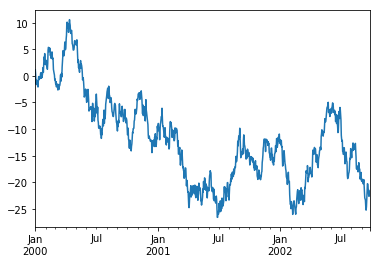

In [82]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [83]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [84]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

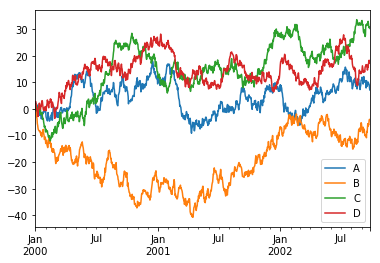

In [85]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [86]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [87]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.140684,1.110322,-0.005744,2.504908
1,2000-01-02,0.489363,1.926709,0.307177,2.813094
2,2000-01-03,2.183096,0.192485,-0.488968,1.719845
3,2000-01-04,0.877055,-0.913361,0.283245,0.557173
4,2000-01-05,0.946640,-2.999382,0.799159,0.252162
5,2000-01-06,1.547758,-3.534179,-0.349043,-0.655788
6,2000-01-07,-0.360396,-5.549121,-0.886072,-1.086894
7,2000-01-08,-0.805896,-6.194987,0.609777,-1.963897
8,2000-01-09,-0.521211,-7.239957,0.369353,-2.856248
9,2000-01-10,-0.733152,-7.822590,-1.629012,-0.531313


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [88]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [89]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.140684,1.110322,-0.005744,2.504908
2000-01-02,0.489363,1.926709,0.307177,2.813094
2000-01-03,2.183096,0.192485,-0.488968,1.719845
2000-01-04,0.877055,-0.913361,0.283245,0.557173
2000-01-05,0.946640,-2.999382,0.799159,0.252162
2000-01-06,1.547758,-3.534179,-0.349043,-0.655788
2000-01-07,-0.360396,-5.549121,-0.886072,-1.086894
2000-01-08,-0.805896,-6.194987,0.609777,-1.963897
2000-01-09,-0.521211,-7.239957,0.369353,-2.856248
2000-01-10,-0.733152,-7.822590,-1.629012,-0.531313


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])